## Import Library

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
from umap import UMAP

c:\Users\ardik\Anaconda3\envs\AI_project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Dataset

In [2]:
df_recipes = pd.read_csv('Food Ingredients and Recipe Dataset with Image Name Mapping.csv')
df_numFeature = pd.read_csv('epi_r.csv')

## Exploratory Data Analysis

In [3]:
df_recipes['title_clean'] =df_recipes.Title.str.lower().str.strip()
df_numFeature['title_clean'] =df_numFeature.title.str.lower().str.strip()

In [4]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           13501 non-null  int64 
 1   Title                13496 non-null  object
 2   Ingredients          13501 non-null  object
 3   Instructions         13493 non-null  object
 4   Image_Name           13501 non-null  object
 5   Cleaned_Ingredients  13501 non-null  object
 6   title_clean          13496 non-null  object
dtypes: int64(1), object(6)
memory usage: 738.5+ KB


In [5]:
df_numFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 681 entries, title to title_clean
dtypes: float64(679), object(2)
memory usage: 104.2+ MB


In [6]:
df_recipes.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",miso-butter roast chicken with acorn squash pa...
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",crispy salt and pepper potatoes
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",thanksgiving mac and cheese
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",newton's law


In [7]:
df_numFeature.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,title_clean
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"lentil, apple, and turkey wrap"
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,boudin blanc terrine with red onion confit
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,potato and fennel soup hodge
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,mahi-mahi in tomato olive sauce
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spinach noodle casserole


In [8]:
df_recipes.duplicated().sum()

0

In [9]:
df_recipes[df_recipes.duplicated(subset="title_clean", keep=False)]

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean
12,12,Butternut Squash and Apple Soup,"['6 slices bacon, cut crosswise into ½-inch pi...",Cook bacon in a 6-quart heavy pot over medium ...,butternut-squash-apple-soup-365210,"['6 slices bacon, cut crosswise into ½-inch pi...",butternut squash and apple soup
79,79,Coconut Rice,"['1½ cups raw Thai jasmine rice', '½ cup cocon...","To make the rice, which is best done in a rice...",coconut-rice-leela-punyaratabandhu,"['1½ cups raw Thai jasmine rice', '½ cup cocon...",coconut rice
83,83,Dashi,"['1 gallon cold water', '1 (6-inch) square das...","Put the water, dashima, shiitake mushrooms, an...",my-korea-dashi-hooni-kim,"['1 gallon cold water', '1 (6-inch) square das...",dashi
173,173,Fried Green Tomatoes,"['2 large green tomatoes (1 pound), cleaned an...",Sprinkle tomato slices with 1 teaspoon salt an...,fried-green-tomatoes-up-south-cookbook,"['2 large green tomatoes (1 pound), cleaned an...",fried green tomatoes
174,174,White Russian,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",Combine all the ingredients in a cocktail shak...,white-russian-simonson-3-ingredient-cocktails,"['1½ oz. vodka', '¾ oz. Kahlúa', '¾ oz. heavy ...",white russian
...,...,...,...,...,...,...,...
13382,13382,Butternut Squash and Apple Soup,"['2 tablespoons (1/4 stick) butter', '1 large ...",Melt butter in large pot over medium-high heat...,butternut-squash-and-apple-soup-108605,"['2 tablespoons (1/4 stick) butter', '1 large ...",butternut squash and apple soup
13444,13444,Shepherd's Pie,"['10 oz pearl onions', '4 medium leeks (white ...",Blanch onions in a 2- to 3-quart pot of boilin...,shepherds-pie-107418,"['10 oz pearl onions', '4 medium leeks (white ...",shepherd's pie
13447,13447,Pickled Hot Chiles,"['4 cups distilled white vinegar', '1 1/3 cups...","Wash jars, lids, and screw bands in hot soapy ...",pickled-hot-chiles-107029,"['4 cups distilled white vinegar', '1 1/3 cups...",pickled hot chiles
13483,13483,White Chicken Chili,"['1/2 pound dried navy beans, picked over', '1...",In a large kettle soak beans in cold water to ...,white-chicken-chili-11452,"['1/2 pound dried navy beans, picked over', '1...",white chicken chili


In [10]:
# # 1. Ambil semua row yang memiliki title_clean duplikat
# dup_titles_recipes = df_recipes[df_recipes.duplicated("title_clean", keep=False)]

# # 2. Ambil list title yang duplikat
# bad_titles_recipes = dup_titles_recipes["title_clean"].unique()

# # 3. Tampilkan sejajar
# for t in bad_titles_recipes:
#     print("=== TITLE:", t, "===\n")
#     display(
#         df_recipes[
#             df_recipes["title_clean"] == t
#         ][["Title", "Ingredients", "Instructions"]]
#     )
#     print("\n\n")


In [11]:
df_numFeature.duplicated().sum()

1801

In [12]:
# dup_titles = df_numFeature[df_numFeature.duplicated("title_clean", keep=False)]

# nutri_cols = ["calories", "protein", "fat", "sodium"]

# mask = df_numFeature[nutri_cols].isnull().any(axis=1)

# dup_bad = df_numFeature[
#     df_numFeature["title_clean"].isin(
#         df_numFeature.loc[mask, "title_clean"]
#     )
# ]

# bad_titles = dup_bad["title_clean"].unique()

# for t in bad_titles:
#     print("=== TITLE:", t, "===\n")
#     display(df_numFeature[df_numFeature["title_clean"] == t])
#     print("\n")

In [13]:
df_recipes.describe()

,Unnamed: 0
count,13501.000000
mean,6750.000000
std,3897.547327
min,0.000000
25%,3375.000000
50%,6750.000000
75%,10125.000000
max,13500.000000


In [14]:
df_numFeature.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
"""
Hasil EDA probelm :
Data Recipes :
- Tidak ada duplikat pada satu baris penuh, namun terdapat duplikat dimana title resep sama namun memiliki
  instruction dan ingredients yang berbeda !!!

Data numFeature
- Terdapat duplikat sebesar 1801 row
- Selain itu juga terdaoat duplikat title, namun memiliki nutrisi dan kandungan binary ingredient
  yang berbeda beda juga
"""

## Preprocessing

### Data Cleaning

In [15]:
df_numFeature = df_numFeature.drop_duplicates(keep="first")

In [16]:
df_numFeature.duplicated().sum()

0

In [17]:
nutri_cols = ["calories", "protein", "fat", "sodium"]

In [18]:
def resolve_nutrition_duplicates(df):
    nutri_cols = ["calories", "protein", "fat", "sodium"]

    df = df.copy()
    df["nutri_missing"] = df[nutri_cols].isnull().sum(axis=1)

    cleaned_rows = []

    for name, group in df.groupby("title_clean"):

        # CASE A : hanya 1 → aman
        if len(group) == 1:
            cleaned_rows.append(group.iloc[[0]])
            continue

        # CASE B : ada nutrisi lengkap (missing 0)
        complete = group[group["nutri_missing"] == 0]
        if len(complete) > 0:
            best = complete.sort_values("rating", ascending=False).iloc[[0]]
            cleaned_rows.append(best)
            continue

        # CASE C : semua incomplete, ambil missing terkecil
        best = group.sort_values("nutri_missing").iloc[[0]]
        cleaned_rows.append(best)

    return pd.concat(cleaned_rows, ignore_index=True)


In [19]:
df_num_clean = resolve_nutrition_duplicates(df_numFeature)
df_num_clean.shape

(17733, 682)

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
df_num_clean.isnull().sum()

title                          0
rating                         0
calories                    3630
protein                     3654
fat                         3672
sodium                      3631
#cakeweek                      0
#wasteless                     0
22-minute meals                0
3-ingredient recipes           0
30 days of groceries           0
advance prep required          0
alabama                        0
alaska                         0
alcoholic                      0
almond                         0
amaretto                       0
anchovy                        0
anise                          0
anniversary                    0
anthony bourdain               0
aperitif                       0
appetizer                      0
apple                          0
apple juice                    0
apricot                        0
arizona                        0
artichoke                      0
arugula                        0
asian pear                     0
asparagus 

In [23]:
df_num_clean[nutri_cols].isnull().sum()
df_num_clean[nutri_cols].isnull().all(axis=1).sum()

3630

##### Melakukan imputasi dengan drop

In [24]:
df_num_clean.dropna(subset=nutri_cols).shape
# Karena setelah diimputasi dengan cara drop data yang tersisa masih cukup banyak sekitar 14057 data, 
# maka imputasi adalah pilihan terbaik, karena kalau pakai median data akan menjadi tidak representatif 
# karena missing valunya mencakup 20% data

(14057, 682)

In [ ]:
# Untuk tahap pertama ini saya akan mencoba cleaning dengan cara drop data yang memiliki missing value

# df_num_clean = df_num_clean.dropna(subset=nutri_cols).reset_index(drop=True)

##### Tidak melakukan imputasi namun nutrisinya akan dipishakan antara yang complate dan tidak complate

In [25]:
df_num_clean[nutri_cols].isnull().sum()

calories    3630
protein     3654
fat         3672
sodium      3631
dtype: int64

In [26]:
df_num_clean.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,nutri_missing
count,17733.000000,1.410300e+04,14079.000000,1.406100e+04,1.410200e+04,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,...,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000
mean,3.731496,6.799607e+03,94.491370,3.729447e+02,6.750431e+03,0.000338,0.000056,0.000959,0.001523,0.000395,...,0.027519,0.000056,0.000338,0.016072,0.000169,0.000395,0.001466,0.000959,0.020414,0.822591
std,1.315613,3.800454e+05,3560.161374,2.165106e+04,3.533106e+05,0.018392,0.007509,0.030948,0.038992,0.019865,...,0.163596,0.007509,0.018392,0.125755,0.013006,0.019865,0.038264,0.030948,0.141415,1.613966
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,2.080000e+02,3.000000,8.000000e+00,9.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.500000e+02,9.000000,1.800000e+01,3.100000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,6.050000e+02,29.000000,3.400000e+01,7.407500e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [27]:
df_num_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17733 entries, 0 to 17732
Columns: 682 entries, title to nutri_missing
dtypes: float64(679), int64(1), object(2)
memory usage: 92.3+ MB


In [ ]:
# df_recipes["recipe_id"] = df_recipes.index

In [28]:
df_merged = df_recipes.merge(
    df_num_clean,
    on="title_clean",
    how="inner"
)

In [29]:
df_merged.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean,title,rating,calories,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,nutri_missing
0,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in...",italian sausage and bread stuffing,Italian Sausage and Bread Stuffing,5.000,407.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,12,Butternut Squash and Apple Soup,"['6 slices bacon, cut crosswise into ½-inch pi...",Cook bacon in a 6-quart heavy pot over medium ...,butternut-squash-apple-soup-365210,"['6 slices bacon, cut crosswise into ½-inch pi...",butternut squash and apple soup,Butternut Squash and Apple Soup,3.750,163.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,31,Shrimp Creole,"['3 garlic cloves, minced', '2 large onions, c...","In a large heavy kettle cook garlic, onions, c...",shrimp-creole-14653,"['3 garlic cloves, minced', '2 large onions, c...",shrimp creole,Shrimp Creole,3.750,492.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,34,Our Favorite Creamy Mashed Potatoes,"['4 pounds Yukon Gold potatoes, peeled, cut in...","Cover potatoes, garlic, and 1 Tbsp. salt with ...",our-favorite-creamy-mashed-potatoes,"['4 pounds Yukon Gold potatoes, peeled, cut in...",our favorite creamy mashed potatoes,Our Favorite Creamy Mashed Potatoes,4.375,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,79,Coconut Rice,"['1½ cups raw Thai jasmine rice', '½ cup cocon...","To make the rice, which is best done in a rice...",coconut-rice-leela-punyaratabandhu,"['1½ cups raw Thai jasmine rice', '½ cup cocon...",coconut rice,Coconut Rice,4.375,369.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
df_merged.shape

(5948, 688)

In [31]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5948 entries, 0 to 5947
Columns: 688 entries, Unnamed: 0 to nutri_missing
dtypes: float64(679), int64(2), object(7)
memory usage: 31.2+ MB


In [33]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [32]:
df_merged.isnull().sum()

Unnamed: 0                     0
Title                          0
Ingredients                    0
Instructions                   0
Image_Name                     0
Cleaned_Ingredients            0
title_clean                    0
title                          0
rating                         0
calories                    1583
protein                     1587
fat                         1588
sodium                      1583
#cakeweek                      0
#wasteless                     0
22-minute meals                0
3-ingredient recipes           0
30 days of groceries           0
advance prep required          0
alabama                        0
alaska                         0
alcoholic                      0
almond                         0
amaretto                       0
anchovy                        0
anise                          0
anniversary                    0
anthony bourdain               0
aperitif                       0
appetizer                      0
apple     

In [ ]:
# Karena terdapat missing value pada data merged

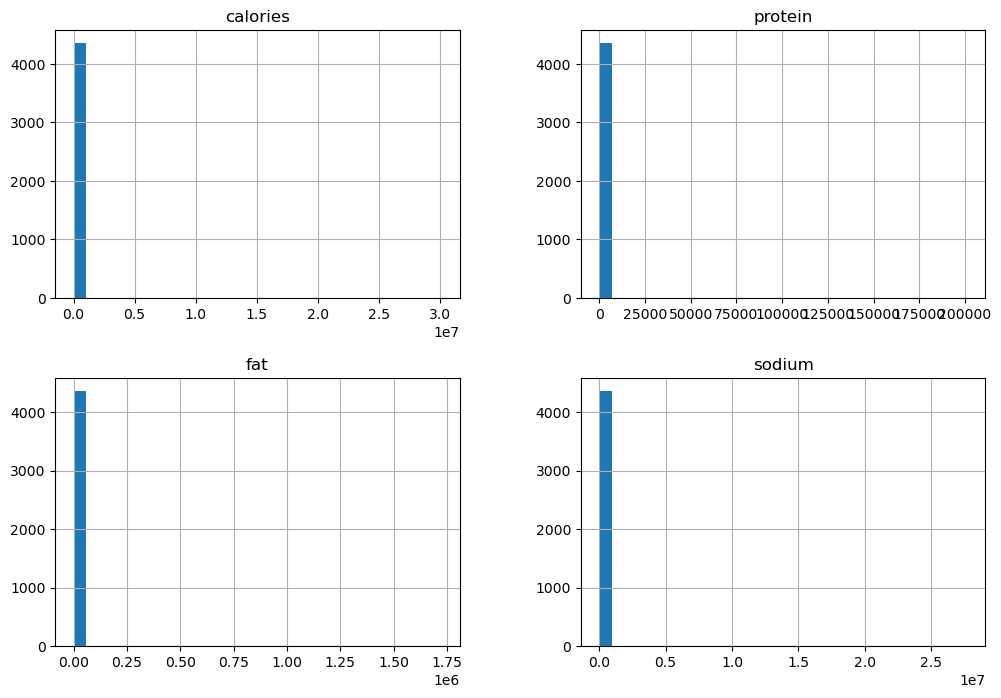

In [35]:
df_merged[nutri_cols].hist(bins=30, figsize=(12,8))
plt.show()

In [36]:
# df_merged.to_csv('merged_recipes_with_numerical_feature.csv', index=False )

In [37]:
df_merged.duplicated().sum()

0

### Feature Engginering

In [38]:
"""
Melakukan penyaringan feature yang sesuai dimana sesuai dengan kriteria sebagai beriut ini :
Nutrition : 
- calories
- protein
- fat
- sodium

Allergens :
1 dairy
2 eggs
3 fish
4 shellfish
5 soy
6 sesame
7 wheat
8 peanuts
9 tree nuts

Dietary Preference :
1. Halal
2. Lactose Intolerance
3. Low Carb
4. Weight Loss
5. Gluten-Free
6. Dairy-Free
7. Spicy
8. No Fried Food

Keterangan :
Halal
Makanan yang diproses dan disiapkan sesuai aturan Islam (tidak mengandung babi, alkohol, dan harus disembelih secara halal).

Lactose Intolerance
Tidak bisa mencerna laktosa, sehingga harus menghindari susu sapi dan produk berbahan susu yang ada laktosa (seperti keju atau yogurt biasa).

Keto / Low Carb
Pola makan yang sangat rendah karbohidrat dan tinggi lemak untuk membantu tubuh membakar lemak sebagai energi.

Weight Loss
Preferensi makanan rendah kalori, rendah gula, atau rendah lemak untuk membantu menurunkan berat badan.

High Protein
Fokus pada makanan tinggi protein seperti ayam, ikan, telur, tahu, dan kacang untuk membantu energi, kenyang lebih lama, atau membangun otot.

Gluten-Free
Menghindari gluten (protein dalam gandum, barley, rye) karena alergi, sensitivitas, atau gangguan pencernaan.

Dairy-Free
Menghindari semua produk susu (baik ada laktosa atau tidak) seperti susu, keju, mentega, yogurt — baik karena alergi maupun preferensi.

Spicy
Menyukai makanan pedas atau berbumbu kuat.

No Fried Food
Menghindari makanan yang digoreng untuk alasan kesehatan atau preferensi rasa (misalnya memilih panggang, kukus, atau rebus).
"""

'\nMelakukan penyaringan feature yang sesuai dimana sesuai dengan kriteria sebagai beriut ini :\nNutrition : \n- calories\n- protein\n- fat\n- sodium\n\nAllergens :\n1 dairy\n2 eggs\n3 fish\n4 shellfish\n5 soy\n6 sesame\n7 wheat\n8 peanuts\n9 tree nuts\n\nDietary Preference :\n1. Halal\n2. Lactose Intolerance\n3. Low Carb\n4. Weight Loss\n5. Gluten-Free\n6. Dairy-Free\n7. Spicy\n8. No Fried Food\n\nKeterangan :\nHalal\nMakanan yang diproses dan disiapkan sesuai aturan Islam (tidak mengandung babi, alkohol, dan harus disembelih secara halal).\n\nLactose Intolerance\nTidak bisa mencerna laktosa, sehingga harus menghindari susu sapi dan produk berbahan susu yang ada laktosa (seperti keju atau yogurt biasa).\n\nKeto / Low Carb\nPola makan yang sangat rendah karbohidrat dan tinggi lemak untuk membantu tubuh membakar lemak sebagai energi.\n\nWeight Loss\nPreferensi makanan rendah kalori, rendah gula, atau rendah lemak untuk membantu menurunkan berat badan.\n\nHigh Protein\nFokus pada makanan

In [39]:
df_merged["halal"] = (
    (df_merged["pork"]==0) &
    (df_merged["pork chop"]==0) &
    (df_merged["pork rib"]==0) &
    (df_merged["pork tenderloin"]==0) &
    (df_merged["bacon"]==0) &
    (df_merged["ham"]==0) &
    (df_merged["prosciutto"]==0) &
    (df_merged["sausage"]==0) &
    (df_merged["alcoholic"]==0) &
    (df_merged["beer"]==0) &
    (df_merged["wine"]==0) &
    (df_merged["white wine"]==0) &
    (df_merged["red wine"]==0) &
    (df_merged["sparkling wine"]==0) &
    (df_merged["champagne"]==0) &
    (df_merged["spirit"]==0) &
    (df_merged["whiskey"]==0) &
    (df_merged["vodka"]==0) &
    (df_merged["rum"]==0) &
    (df_merged["gin"]==0) &
    (df_merged["bourbon"]==0) &
    (df_merged["scotch"]==0) &
    (df_merged["tequila"]==0) &
    (df_merged["mezcal"]==0) &
    (df_merged["liqueur"]==0) &
    (df_merged["fortified wine"]==0) &
    (df_merged["brandy"]==0) &
    (df_merged["cognac/armagnac"]==0) &
    (df_merged["marsala"]==0) & 
    (df_merged["vermouth"]==0) & 
    (df_merged["sherry"]==0) & 
    (df_merged["port"]==0) & 
    (df_merged["kirsch"]==0)
    
).astype(int)

In [40]:
df_merged["is_lactose_free"] = (
    # Fitur Produk Susu dan Lemak Susu
    (df_merged["dairy"]==0) &
    (df_merged["milk/cream"]==0) &
    (df_merged["butter"]==0) &
    (df_merged["buttermilk"]==0) &
    (df_merged["yogurt"]==0) &
    (df_merged["sour cream"]==0) &
    (df_merged["ice cream"]==0) &
    (df_merged["cottage cheese"]==0) &
    (df_merged["cream cheese"]==0) &
    (df_merged["ricotta"]==0) &
    (df_merged["marscarpone"]==0) &
    
    # Fitur Keju
    (df_merged["cheese"]==0) &
    (df_merged["cheddar"]==0) &
    (df_merged["brie"]==0) &
    (df_merged["feta"]==0) &
    (df_merged["fontina"]==0) &
    (df_merged["goat cheese"]==0) &
    (df_merged["gouda"]==0) &
    (df_merged["monterey jack"]==0) &
    (df_merged["mozzarella"]==0) &
    (df_merged["parmesan"]==0) &
    (df_merged["swiss cheese"]==0) &
    (df_merged["blue cheese"]==0) &
    
    # Tambahan, meskipun sering tidak mengandung laktosa, ini penting dihindari
    (df_merged["egg nog"]==0)
    
).astype(int)

In [41]:
df_merged["is_spicy"] = (
    # Cabai dan Turunannya (Sumber utama pedas)
    (df_merged["chile"]==1) |
    (df_merged["chile pepper"]==1) |
    (df_merged["chili"]==1) |
    (df_merged["jalapeño"]==1) |
    (df_merged["poblano"]==1) |
    (df_merged["hot pepper"]==1) |
    
    # Rempah dan Bumbu Pedas
    (df_merged["ginger"]==1) |
    (df_merged["wasabi"]==1) |
    (df_merged["curry"]==1) |
    (df_merged["mustard"]==1)
    
).astype(int)

In [42]:
df_merged["is_not_fried"] = (
    # Resep harus TIDAK mengandung (==0) setiap tag penggorengan
    (df_merged["fry"]==0) &
    (df_merged["deep-fry"]==0) &
    (df_merged["pan-fry"]==0)&
    
    # Kita juga bisa mempertimbangkan untuk mengecualikan 'fritter',
    # karena fritter biasanya digoreng.
    (df_merged["fritter"]==0) 
    
).astype(int)

In [43]:
df_merged["weight_loss"] = (
    (df_merged["healthy"]==1) |
    (df_merged["low cal"]==1) |
    (df_merged["low fat"]==1) |
    (df_merged["low sugar"]==1) |
    (df_merged["low/no sugar"]==1) |
    (df_merged["fat free"]==1) |
    (df_merged["high fiber"]==1)
).astype(int)

In [44]:
protein_median = df_merged["protein"].median()
df_merged["high_protein"] = (df_merged["protein"] > protein_median).astype(int)

In [45]:
df_merged["gluten_free"] = df_merged["wheat/gluten-free"]

In [46]:
df_merged.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean,recipe_id,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey

In [47]:
final_features = [
    # Nutrition
    "calories", "protein", "fat", "sodium",
    
    # Allergens
    "dairy", "egg", "fish", "shellfish", "soy", "sesame",
    "whole wheat", "peanut", "tree nut",

    # Dietary Preferences
    "halal", "is_lactose_free", "low carb", "weight_loss",
    "high_protein", "gluten_free", "dairy free",
    "is_spicy", "is_not_fried",

    #  # Food Categories
    "dessert", "cake", "cookie", "pie",
    "ice cream", "frozen dessert", "brownie", "muffin", "cupcake", "candy",
    "breakfast", "pancake", "waffle",
    "drink", "cocktail", "smoothie",
    "lunch", "dinner", "maine",
    "soup/stew", "salad", "side", "snack", "pasta"
]


### Data Transformation

In [48]:
df_merged[["calories", "protein", "fat", "sodium"]].describe()

,calories,protein,fat,sodium
count,4.360000e+03,4360.000000,4.360000e+03,4.360000e+03
mean,1.434907e+04,117.205734,8.216589e+02,1.351842e+04
std,6.436139e+05,4295.464061,3.682329e+04,5.915443e+05
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2.130000e+02,4.000000,9.000000e+00,1.200000e+02
50%,3.725000e+02,10.000000,2.000000e+01,3.700000e+02
75%,6.540000e+02,31.000000,3.700000e+01,8.735000e+02
max,3.011122e+07,200968.000000,1.722763e+06,2.767511e+07


In [49]:
df_merged.nlargest(20, "calories")[["Title", "calories", "protein", "fat", "sodium"]]

,Title,calories,protein,fat,sodium
3298,Pear-Cranberry Mincemeat Lattice Pie,30111218.0,200968.0,1722763.0,27675110.0
3445,Deep-Dish Wild Blueberry Pie,29997918.0,200210.0,1716279.0,27570999.0
2349,Grilled Lamb Chops with Porcini Mustard,24117.0,940.0,2228.0,4382.0
4337,Braised Duck Legs with Shallots and Parsnips,16761.0,477.0,1610.0,3097.0
795,Garlic-Curry Chicken Thighs with Yogurt Sauce,12213.0,907.0,919.0,5252.0
4067,Tamarind-Honey Lamb Kebabs on Mashed Yams,9831.0,840.0,666.0,2624.0
1382,Manhattan Clam Chowder,9811.0,1625.0,128.0,67615.0
58,Chocolate Spoonful Cake,9101.0,97.0,551.0,3204.0
1255,Goose Stew with Barley and Celery Root,8858.0,377.0,776.0,2584.0
1279,Carrot Cake with Cream Cheese Frosting,8624.0,88.0,535.0,5467.0


In [50]:
df_numFeature[df_numFeature["title"] == "Pear-Cranberry Mincemeat Lattice Pie"]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

In [51]:
df_merged.describe()

,Unnamed: 0,recipe_id,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no prob

In [52]:
df_merged[nutri_cols].skew()

calories    46.674523
protein     46.663429
fat         46.674425
sodium      46.672642
dtype: float64

<Axes: >

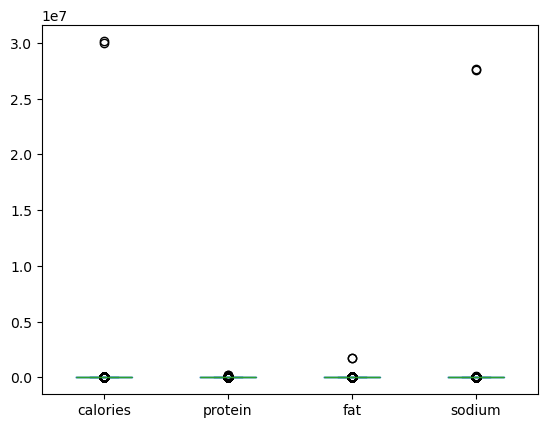

In [53]:
df_merged[nutri_cols].plot.box()

In [54]:
# Hapus datanya karena outlier sangat parah disini 
df_merged = df_merged[
    (df_merged["calories"] < 2000) &
    (df_merged["protein"] < 200) &
    (df_merged["fat"] < 200) &
    (df_merged["sodium"] < 3000)
]

<Axes: >

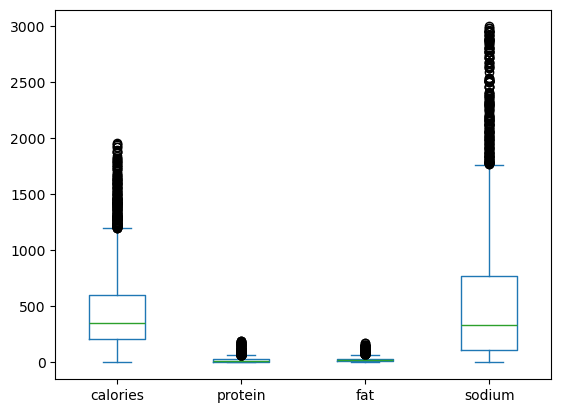

In [55]:
df_merged[nutri_cols].plot.box()

In [220]:
df_merged.shape

(4131, 697)

In [221]:
df_merged = df_merged.reset_index(drop=True)

In [222]:
# scaler = StandardScaler()
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_merged[final_features])

In [223]:
pca = PCA(n_components=8, random_state=42)
X_pca = pca.fit_transform(X_scaled)

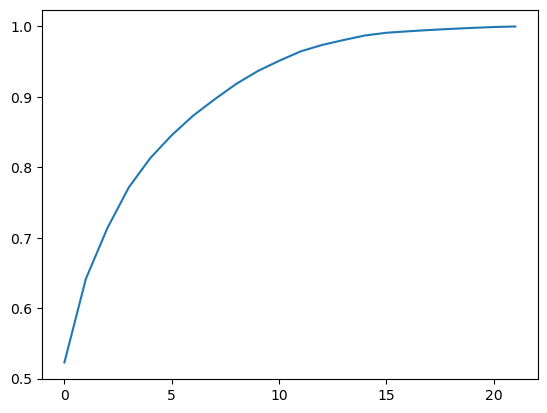

In [224]:
import numpy as np
pca_test = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))

## Modeling

### Find Best K Value

In [225]:
best_k = None
best_score = -1

for k in range(3, 15):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}, silhouette={score}")

    if score > best_score:
        best_score = score
        best_k = k

print("Best k =", best_k, "with silhouette =", best_score)


k=3, silhouette=0.2977759872046845
k=4, silhouette=0.1856896793206798
k=5, silhouette=0.17571012389592752
k=6, silhouette=0.18550782360270518
k=7, silhouette=0.1946355494102843
k=8, silhouette=0.17936431773396525
k=9, silhouette=0.18480671908856552
k=10, silhouette=0.18590903974453987
k=11, silhouette=0.2029558384673695
k=12, silhouette=0.17832271794036586
k=13, silhouette=0.20128213209240228
k=14, silhouette=0.20253512955917233
Best k = 3 with silhouette = 0.2977759872046845


### Training With KMeans

In [226]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
df_merged["cluster"] = final_kmeans.fit_predict(X_pca)


## Evaluation

### Evaluation Metrics

In [227]:
silhouette = silhouette_score(X_pca, df_merged["cluster"])
ch = calinski_harabasz_score(X_pca, df_merged["cluster"])
db = davies_bouldin_score(X_pca, df_merged["cluster"])

print("Silhouette:", silhouette)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)


Silhouette: 0.2977759872046845
Calinski-Harabasz: 2113.966408450438
Davies-Bouldin: 1.3448620398030855


### Visualization Cluster

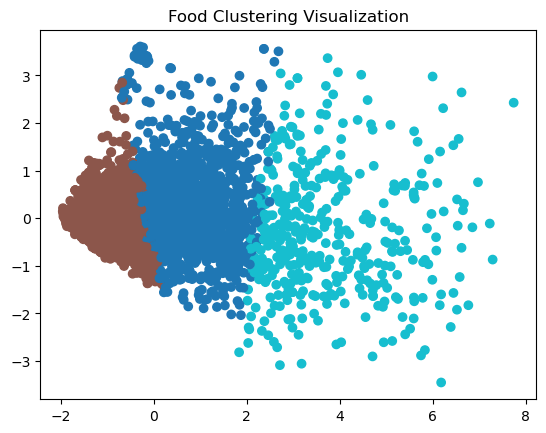

In [228]:
vis = X_pca[:, :2]

plt.scatter(vis[:,0], vis[:,1], c=df_merged["cluster"], cmap="tab10")
plt.title("Food Clustering Visualization")
plt.show()


In [229]:
def visualize_clusters(df, X_pca, kmeans_model, figsize=(16,12)):
    """
    Membuat 4 visualisasi cluster untuk dataset food recommendation.
    
    - PCA Scatter Plot (PC1 vs PC2)
    - Cluster Size Distribution
    - Average Protein per Cluster
    - Average Calories per Cluster
    """

    cluster_labels = df["cluster"].values
    OPTIMAL_K = len(df["cluster"].unique())

    print(f"\nCreating cluster visualizations... (K={OPTIMAL_K})")

    # Convert X_pca to DataFrame for indexing clarity
    X_pca_df = pd.DataFrame(X_pca, index=df.index)

    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(f'Food Clustering Analysis (K={OPTIMAL_K})', fontsize=18)

    # ────────────────────────────────────────────
    # Plot 1 — PCA Scatter (PC1 vs PC2)
    # ────────────────────────────────────────────
    scatter = axes[0, 0].scatter(
        X_pca_df.iloc[:, 0], 
        X_pca_df.iloc[:, 1], 
        c=cluster_labels, cmap='viridis', 
        alpha=0.65, s=45
    )
    axes[0, 0].set_xlabel('PC1')
    axes[0, 0].set_ylabel('PC2')
    axes[0, 0].set_title('Clusters in PCA Space (PC1 vs PC2)')

    # Optional: plot centroids  
    # Convert centroid PCA back to real PCA components
    centroids_pca_2d = kmeans_model.cluster_centers_[:, :2]
    axes[0, 0].scatter(
        centroids_pca_2d[:,0], centroids_pca_2d[:,1],
        marker='X', s=180, color='red', label='Centroids'
    )
    axes[0, 0].legend()

    plt.colorbar(scatter, ax=axes[0, 0], label='Cluster')


    # ────────────────────────────────────────────
    # Plot 2 — Cluster Size Distribution
    # ────────────────────────────────────────────
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    axes[0, 1].bar(
        cluster_counts.index,
        cluster_counts.values,
        color=plt.cm.tab10(range(OPTIMAL_K)),
        edgecolor='black'
    )
    axes[0, 1].set_title("Cluster Size Distribution")
    axes[0, 1].set_xlabel("Cluster ID")
    axes[0, 1].set_ylabel("Number of Recipes")
    axes[0, 1].grid(axis='y', alpha=0.3)


    # ────────────────────────────────────────────
    # Plot 3 — Average Protein per Cluster
    # ────────────────────────────────────────────
    avg_protein = df.groupby("cluster")["protein"].mean()
    axes[1, 0].bar(
        avg_protein.index,
        avg_protein.values,
        color="mediumseagreen",
        edgecolor='black'
    )
    axes[1, 0].set_title("Average Protein per Cluster")
    axes[1, 0].set_xlabel("Cluster ID")
    axes[1, 0].set_ylabel("Protein (grams)")
    axes[1, 0].grid(axis='y', alpha=0.3)


    # ────────────────────────────────────────────
    # Plot 4 — Average Calories per Cluster
    # ────────────────────────────────────────────
    avg_cal = df.groupby("cluster")["calories"].mean()
    axes[1, 1].bar(
        avg_cal.index,
        avg_cal.values,
        color="coral",
        edgecolor='black'
    )
    axes[1, 1].set_title("Average Calories per Cluster")
    axes[1, 1].set_xlabel("Cluster ID")
    axes[1, 1].set_ylabel("Calories")
    axes[1, 1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()



Creating cluster visualizations... (K=3)


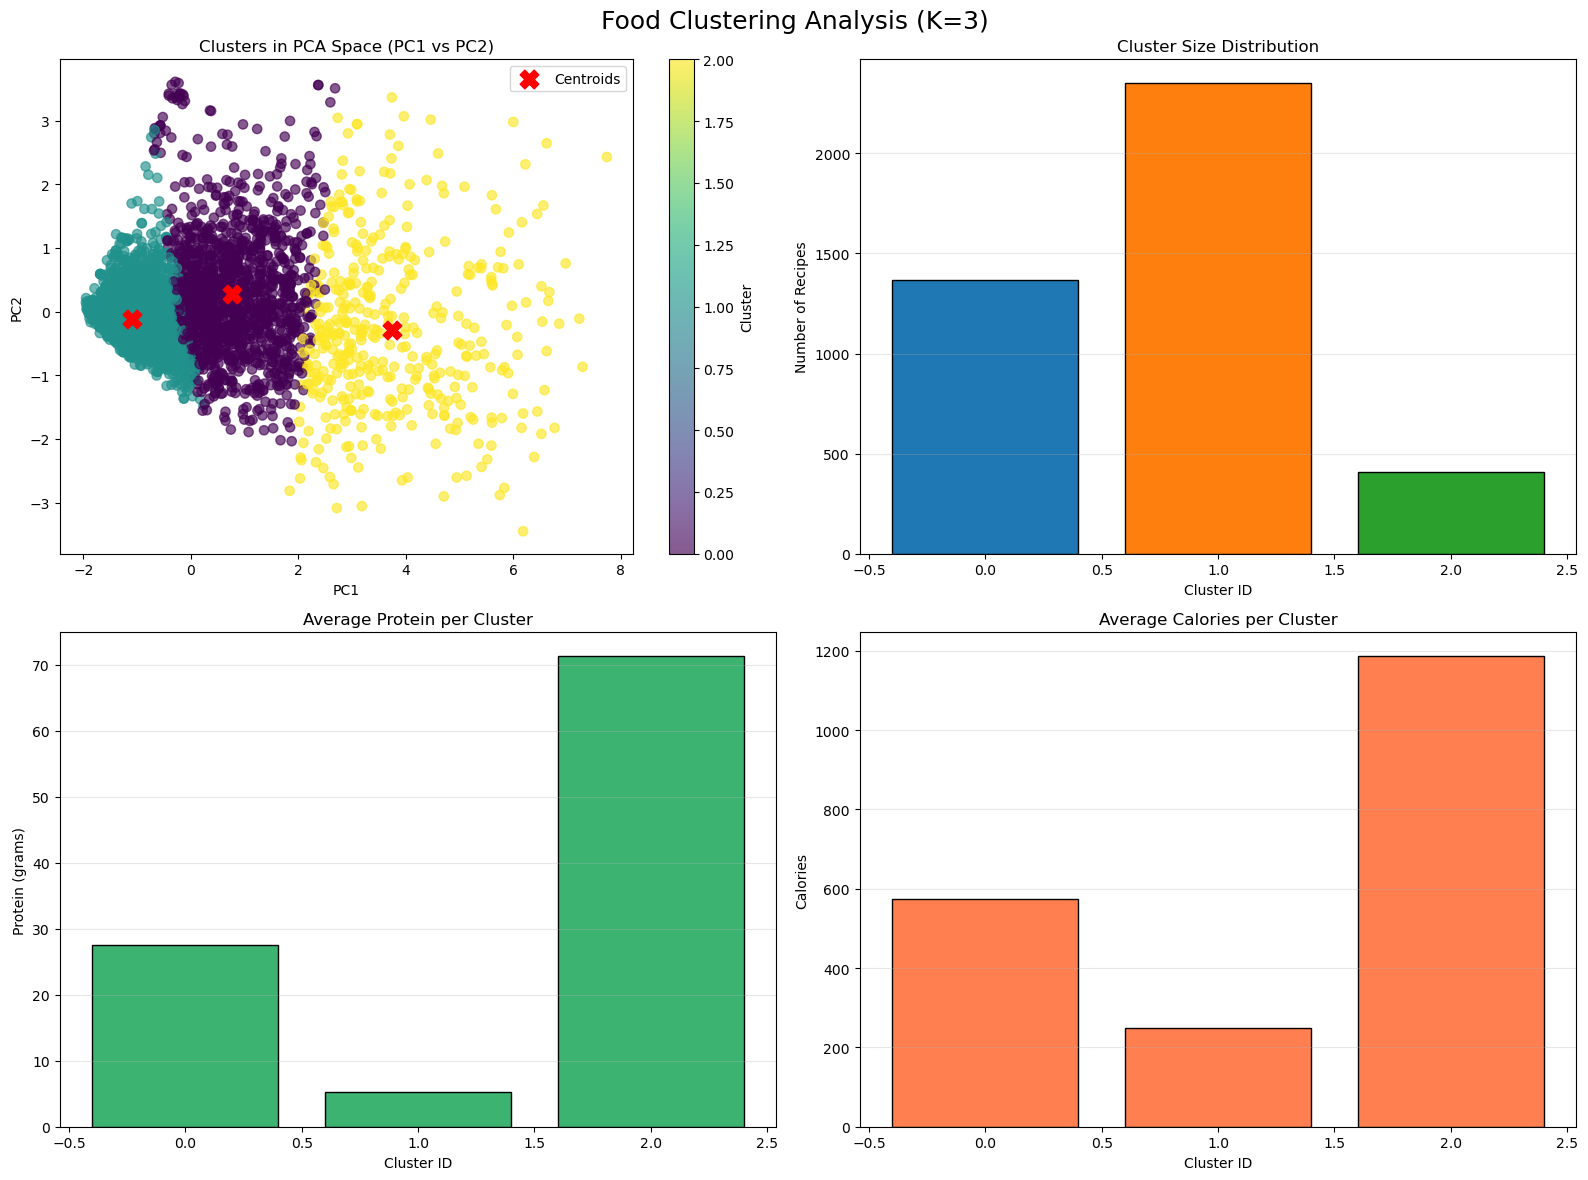

In [230]:
visualize_clusters(df_merged, X_pca, final_kmeans)

In [231]:
print(df_merged.head())

   Unnamed: 0                               Title  \
0           3  Italian Sausage and Bread Stuffing   
1          12     Butternut Squash and Apple Soup   
2          31                       Shrimp Creole   
3          79                        Coconut Rice   
4          83                               Dashi   

                                         Ingredients  \
0  ['1 (¾- to 1-pound) round Italian loaf, cut in...   
1  ['6 slices bacon, cut crosswise into ½-inch pi...   
2  ['3 garlic cloves, minced', '2 large onions, c...   
3  ['1½ cups raw Thai jasmine rice', '½ cup cocon...   
4  ['1 gallon cold water', '1 (6-inch) square das...   

                                        Instructions  \
0  Preheat oven to 350°F with rack in middle. Gen...   
1  Cook bacon in a 6-quart heavy pot over medium ...   
2  In a large heavy kettle cook garlic, onions, c...   
3  To make the rice, which is best done in a rice...   
4  Put the water, dashima, shiitake mushrooms, an...   

       

## Testing

##### Berdasarkan cluster dan cosine similiarity

In [232]:
def recommend_food(recipe_id, df, X_pca, top_k=10):
    """
    Menghasilkan rekomendasi makanan berdasarkan:
    - cluster yang sama
    - cosine similarity pada PCA vector
    """
    
    # Ambil cluster dari makanan yang dipilih user
    target_cluster = df.loc[recipe_id, "cluster"]
    
    # Ambil semua makanan dalam cluster tersebut
    cluster_indices = df[df["cluster"] == target_cluster].index.tolist()
    
    # Ambil vector PCA makanan target
    target_vec = X_pca[recipe_id].reshape(1, -1)
    
    # Ambil vector PCA seluruh makanan dalam cluster
    cluster_vecs = X_pca[cluster_indices]
    
    # Hitung cosine similarity
    sims = cosine_similarity(target_vec, cluster_vecs)[0]
    
    # Buat dataframe ranking
    results = pd.DataFrame({
        "index": cluster_indices,
        "similarity": sims
    }).sort_values(by="similarity", ascending=False)
    
    # Hilangkan diri sendiri dari rekomendasi
    results = results[results["index"] != recipe_id]
    
    # Ambil top-K
    top_results = results.head(top_k)
    
    # Gabungkan dengan informasi makanan
    recommendations = df.loc[top_results["index"], ["Title", "Image_Name"]].copy()
    recommendations["similarity"] = top_results["similarity"].values
    
    return recommendations.reset_index(drop=True)


##### Berdasarkan distance ke centroid K-Means

In [233]:
def recommend_by_centroid(recipe_id, df, X_pca, kmeans, top_k=10):
    """
    Rekomendasi berdasarkan jarak ke centroid cluster.
    """
    
    # Cluster target
    target_cluster = df.loc[recipe_id, "cluster"]
    
    # Centroid PCA dari cluster ini
    centroid = kmeans.cluster_centers_[target_cluster]
    
    # Ambil index anggota cluster
    cluster_indices = df[df["cluster"] == target_cluster].index.tolist()
    
    # Hitung distance untuk tiap item terhadap centroid
    distances = []
    for idx in cluster_indices:
        vec = X_pca[idx]
        d = norm(vec - centroid)
        distances.append((idx, d))
    
    # Urutkan dari yang PALING DEKAT
    distances = sorted(distances, key=lambda x: x[1])
    
    # Hilangkan diri sendiri
    distances = [item for item in distances if item[0] != recipe_id]
    
    # Ambil top-K
    top_ids = distances[:top_k]
    
    recommendations = df.loc[[i[0] for i in top_ids], ["Title", "Image_Name"]].copy()
    recommendations["distance"] = [i[1] for i in top_ids]
    
    return recommendations.reset_index(drop=True)


In [234]:
print("Target : ",df_merged['Title'].loc[80])

Target :  Quick Raspberry Charlotte


In [235]:
# Berdasarkan pada cluster jadi nantinya yang dipakai adalah rec1
rec1 = recommend_food(80, df_merged, X_pca, top_k=10)
print(rec1)

rec2 = recommend_by_centroid(80, df_merged, X_pca, final_kmeans, top_k=10)
print(rec2)


                                   Title  \
0                    Brandy Alexander II   
1      Kahlúa-Spiked Frozen Mocha Lattes   
2                      Hot White Russian   
3                       Avocado Daiquiri   
4                          Tom and Jerry   
5                           Stout Floats   
6               Grand Marnier Crêpe Cake   
7  Puerto Rican Coconut Eggnog (Coquito)   
8                          White Russian   
9                          White Russian   

                                          Image_Name  similarity  
0                         brandy-alexander-ii-200640    0.992885  
1           kahlua-spiked-frozen-mocha-lattes-360236    0.992046  
2                           hot-white-russian-200621    0.990689  
3                            avocado-daiquiri-235568    0.990300  
4                               tom-and-jerry-233665    0.988241  
5                                stout-floats-238690    0.988065  
6                    grand-marnier-crepe-cake-

In [236]:
# import pickle

# pickle.dump(scaler, open("scalerModel2_correct_drop_dataset.pkl", "wb"))
# pickle.dump(pca, open("pcaModel2_correct_drop_dataset.pkl", "wb"))
# pickle.dump(final_kmeans, open("kmeansModel2_correct_drop_dataset.pkl", "wb"))

In [237]:
# df_merged.to_csv('Final_Model_With_Clustering_cleaning_with_drop.csv', index=False)

In [238]:
df_merged.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,title_clean,recipe_id,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey